
# Develop a machine learning model to predict customer churn based on historical customer data.

## Data:
You are provided with a dataset containing historical customer information, including customer
attributes, interactions, and whether they churned or not. The dataset is in CSV format.

## Loading essential libraries

In [676]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [677]:
import random
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

## Loading the dataset

In [678]:
data=pd.read_excel('customer_churn_large_dataset.xlsx')

## Exploratory Data Analysis

In [679]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


The format of the top 5 rows of the data conveys the wide variety of feature types in the dataset.

In [680]:
data.shape

(100000, 9)

There are 100000 rows and 9 features in the dataset.

In [681]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


There are:
* 5 integer columns
* 1 float column
* 3 object columns

In [682]:
data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

CustomerID, Name, Gender and Location are categorical columns and thus need to be handled appropriately via encoding into numerical features.  

Age, Subscription_Length_Months, Monthly_Bill and Total_Usage_GB are numerical features and thus can be handled easily without encoding.  

Churn is the label column that needs to be predicted.

In [683]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


The decriptive statistics show that:
* The average age of the customers using the business product is approximately 44. However the minimum age is 18 and the maximum is 70 for the customers in this dataset.
* The mean and median of age coincide. When the mean and median coincide, it suggests that the distribution of ages is symmetrically distributed, with roughly equal numbers of values on both sides of the central value. In other words, the data is not skewed to the left (positively skewed) or to the right (negatively skewed). This symmetric distribution may indicate that the data follows a normal distribution or a similar symmetrical probability distribution.
* Subscription Length: The average subscription length is approximately 12.5 months, with a minimum of 1 month and a maximum of 24 months. The distribution seems to be relatively evenly spread across the possible subscription lengths.

* Monthly Bill: The average monthly bill is approximately 65.05 units of currency (e.g., dollars). The bills range from a minimum of 30 to a maximum of 100 units. The spread in monthly bills appears to be moderate.

* Total Data Usage: The average total data usage is around 274.39 gigabytes (GB). The usage ranges from a minimum of 50 GB to a maximum of 500 GB. There is a wide range of data usage among customers.

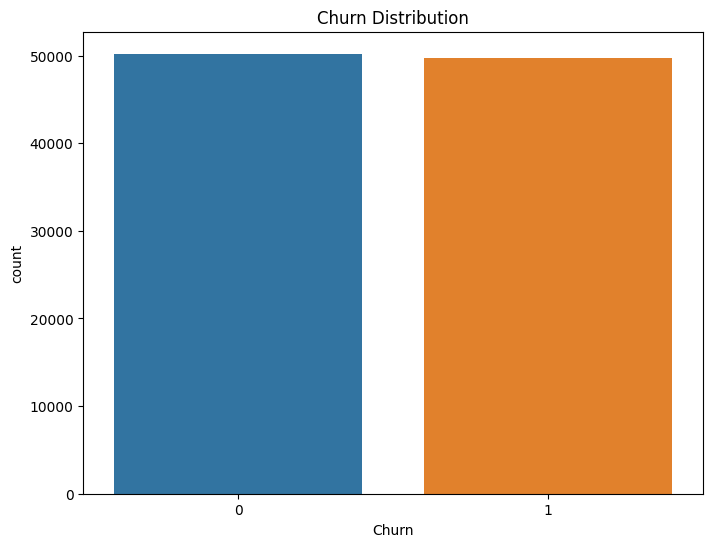

In [684]:
# Distribution of Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

### There are exactly the same number of classes for 0 and 1. Thus, there is no class imbalance in the dataset which is a good thing.  
It is a binary classification supervised machine learning problem.

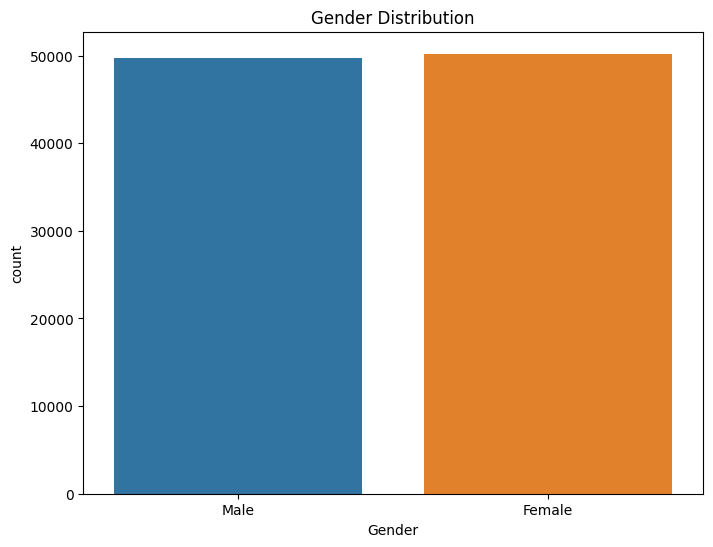

In [685]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

Thus, the gender is equally distributed.

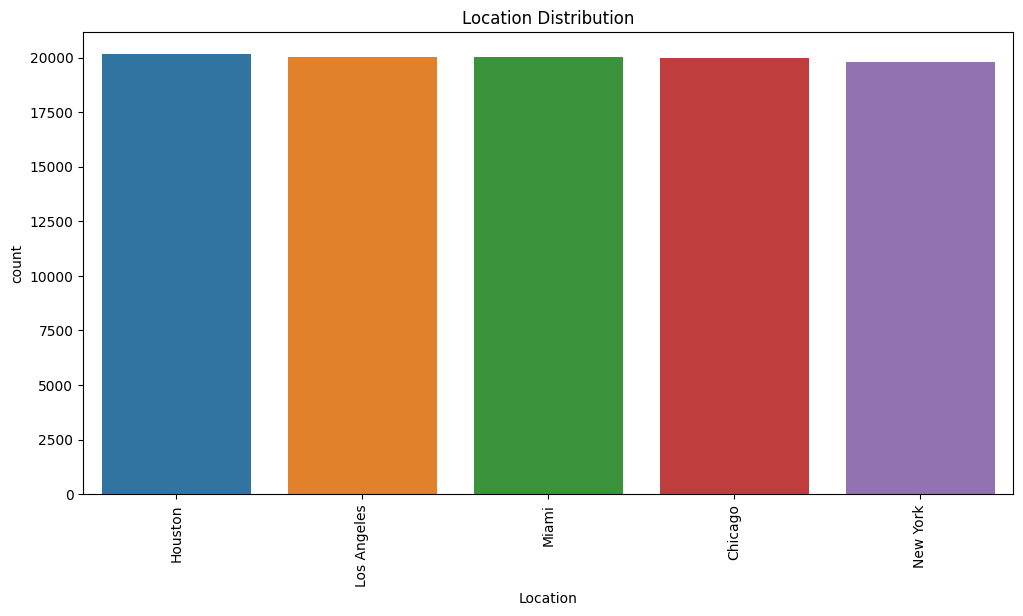

In [686]:
# Location distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=data, order=data['Location'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Location Distribution')
plt.show()

As seen above all the locations have about 20000 values each.

In [687]:
# # Pairplot for numerical variables
# sns.pairplot(data[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']], hue='Churn')
# plt.suptitle('Pairplot of Numerical Variables')
# plt.show()


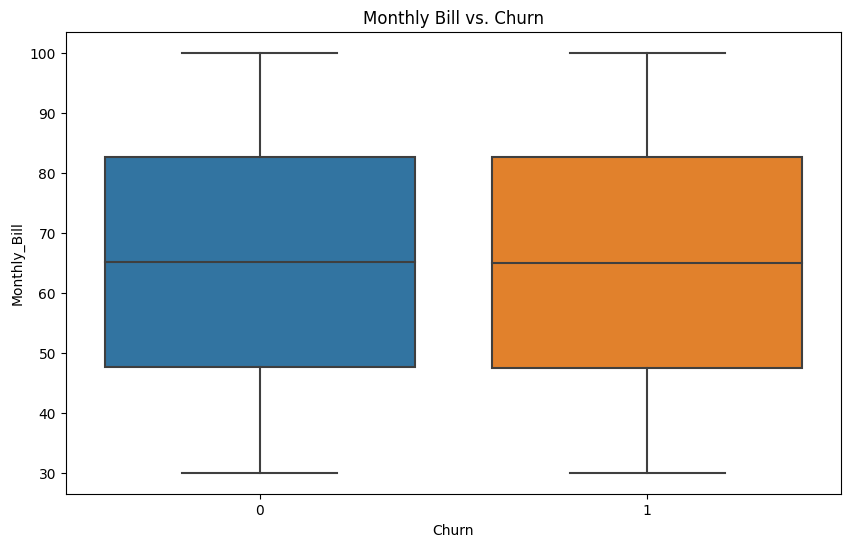

In [688]:
# Box plot for Monthly_Bill vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Monthly_Bill', data=data)
plt.title('Monthly Bill vs. Churn')
plt.show()

* No outliers.
* Uniform distribution of  monthly_bill in both the classes.

<ipython-input-689-da36c9409542>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



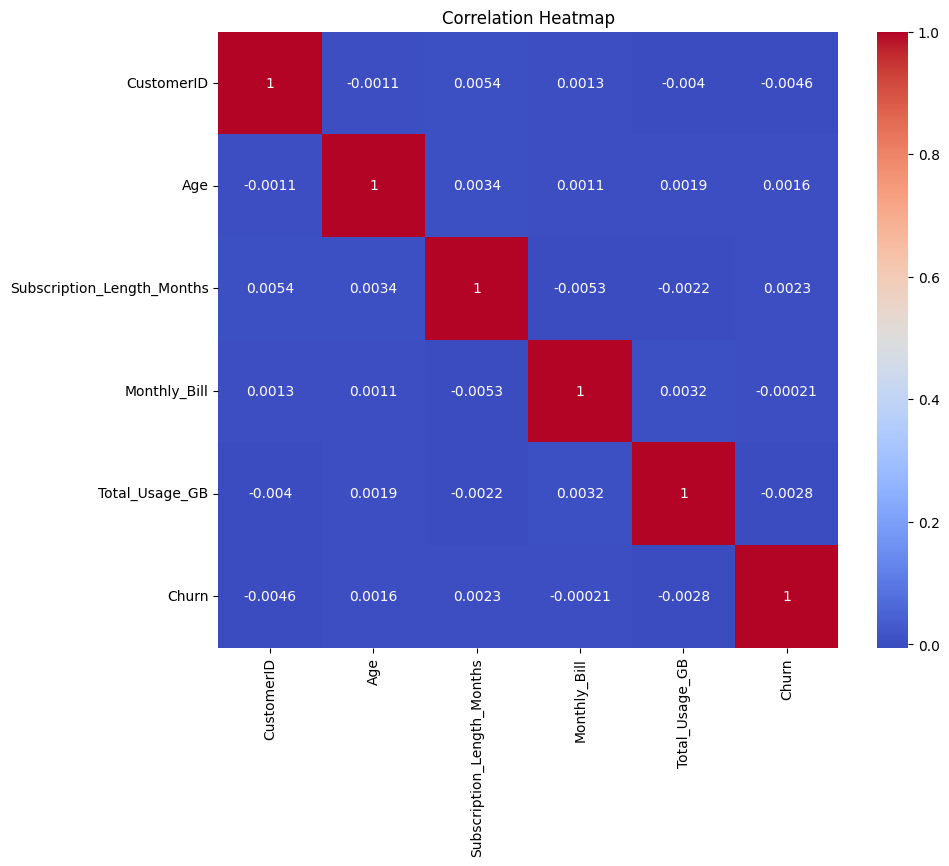

In [689]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As seen above, all the features do not have a direct correlation among them. However non-linear correlations are still possible.

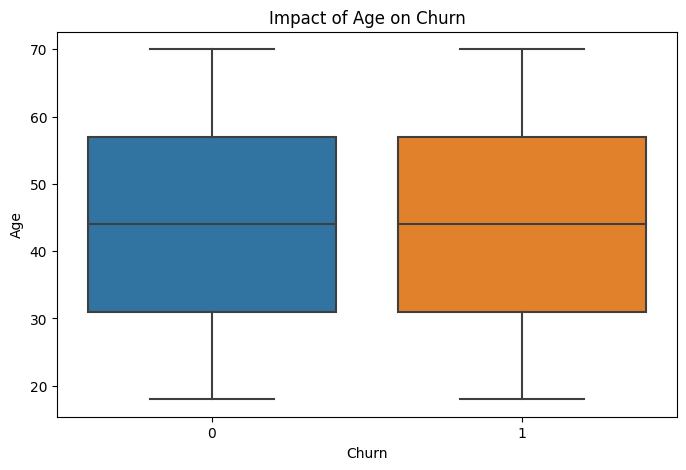

In [690]:
# Visualize the impact of 'Age' on churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Age', data=data)
plt.title('Impact of Age on Churn')
plt.show()

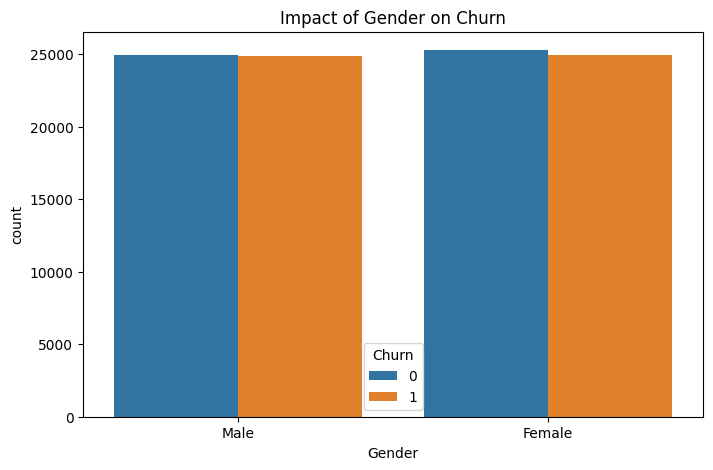

In [691]:
# Visualize the impact of 'Gender' on churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Churn', data=data)
plt.title('Impact of Gender on Churn')
plt.show()

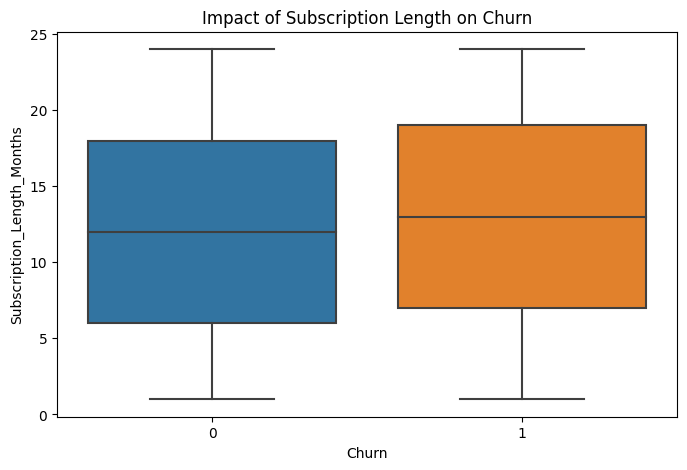

In [692]:
# Visualize the impact of 'Subscription_Length_Months' on churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Subscription_Length_Months', data=data)
plt.title('Impact of Subscription Length on Churn')
plt.show()

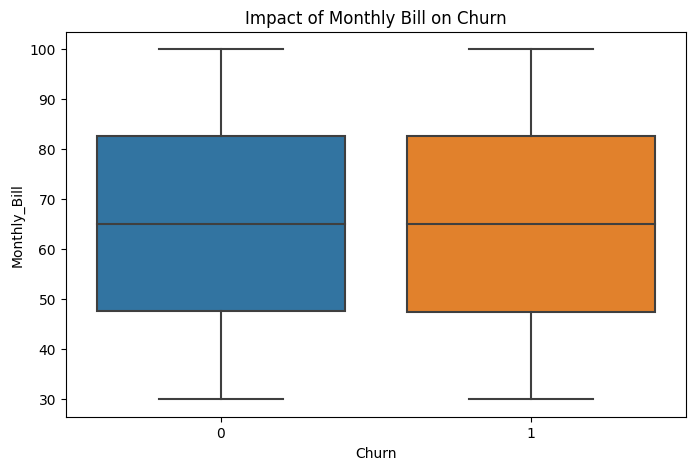

In [693]:
# Visualize the impact of 'Monthly_Bill' on churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Monthly_Bill', data=data)
plt.title('Impact of Monthly Bill on Churn')
plt.show()

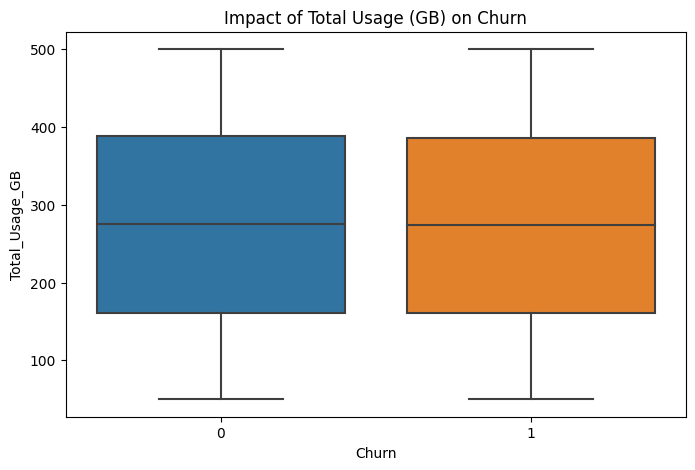

In [694]:
# Visualize the impact of 'Total_Usage_GB' on churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Total_Usage_GB', data=data)
plt.title('Impact of Total Usage (GB) on Churn')
plt.show()

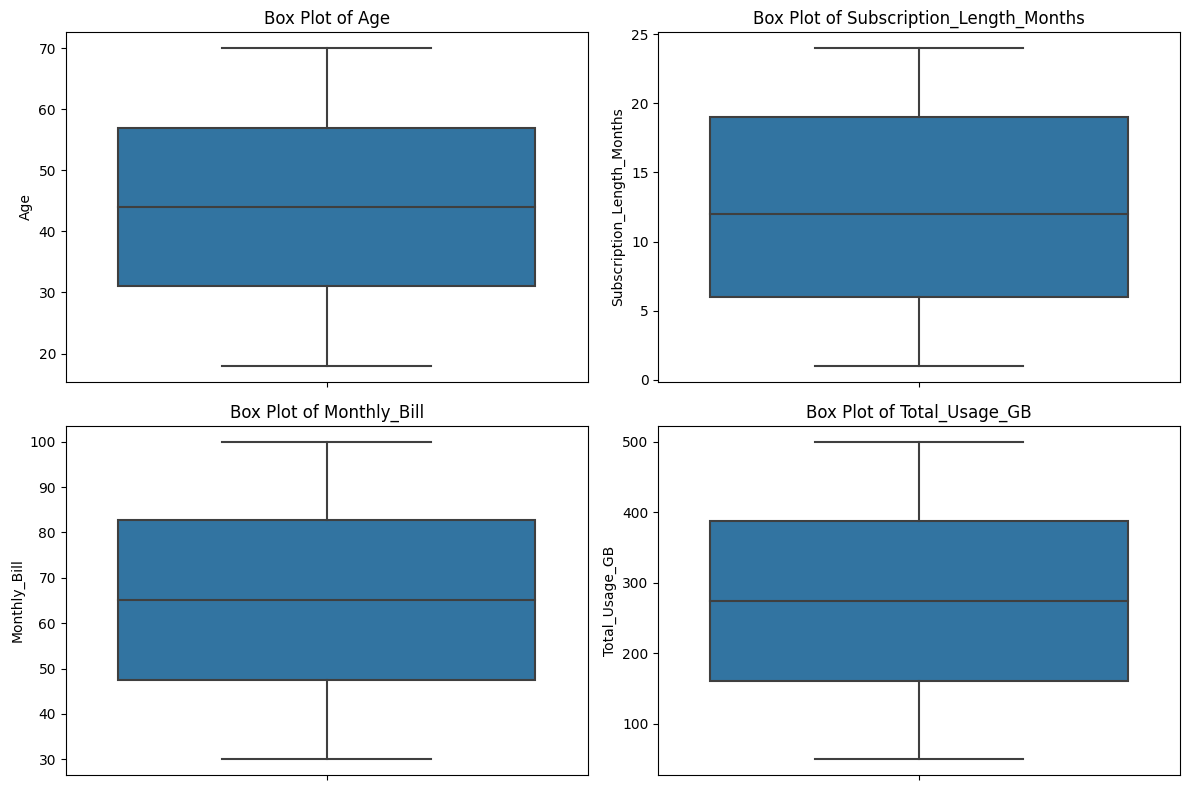

In [695]:
# Box plots for numerical variables
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, y=column)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

## No outliers in numerical columns

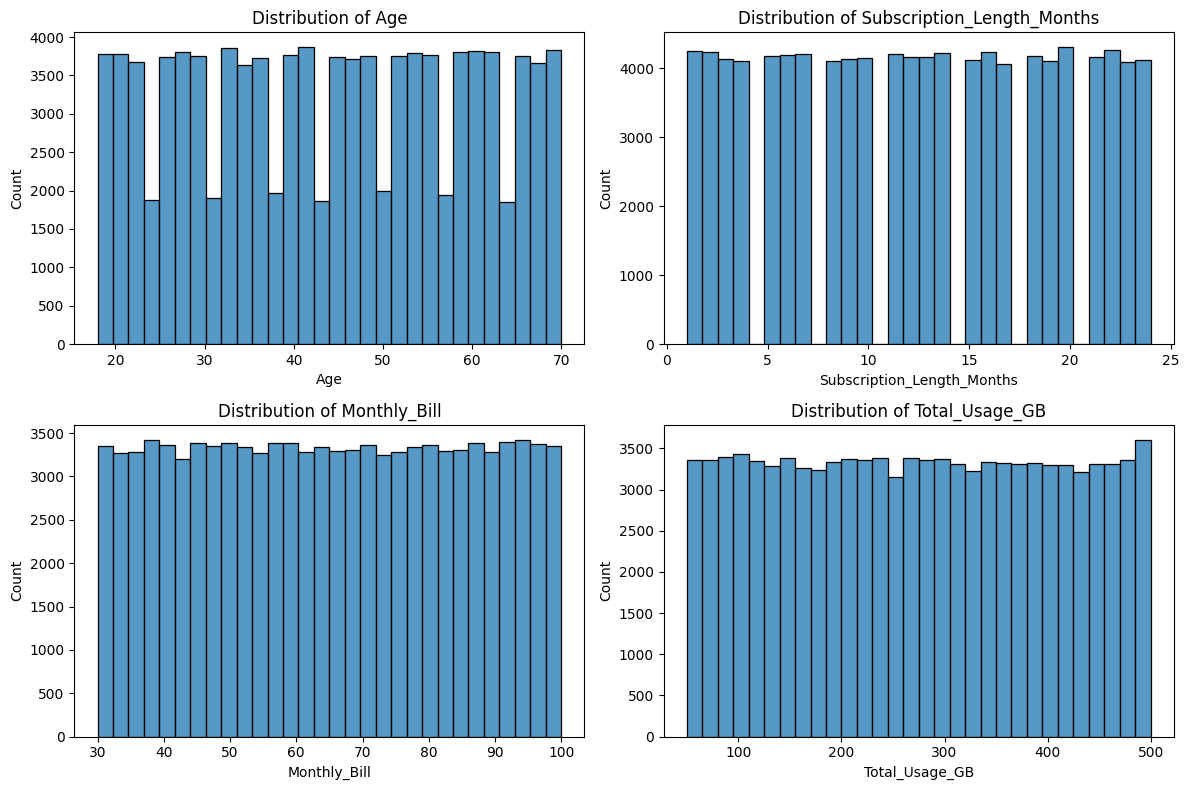

In [696]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=column, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

All the features follow a uniform distribution and thus the data is challenging.

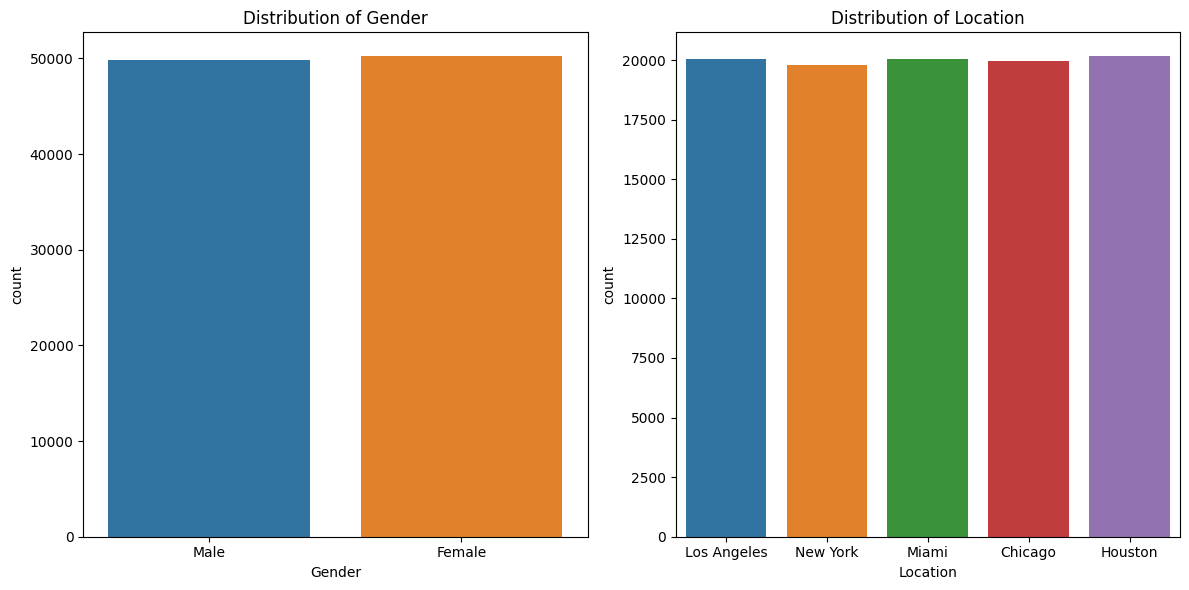

In [697]:
# Distribution of categorical variables
categorical_columns = ['Gender', 'Location']

plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## Handle missing data and outliers.

In [698]:
data.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

No missing data

## Feature engineering

Since there is less correlation between the features and the labels, I am removing the redundant features by combining them into numerical ratios as follows.

In [699]:
data['Subscription_Cost'] = data['Subscription_Length_Months'] * data['Monthly_Bill']
data['Data_Usage_Per_Year'] = data['Total_Usage_GB'] / data['Age']

# Check the updated DataFrame
print(data[['Subscription_Cost', 'Data_Usage_Per_Year']].head())

   Subscription_Cost  Data_Usage_Per_Year
0            1247.12             3.746032
1              48.76             2.774194
2             427.35            19.166667
3             293.82             8.250000
4            1104.66             5.782609


In [700]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Cost,Data_Usage_Per_Year
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12,3.746032
1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76,2.774194
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35,19.166667
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82,8.250000
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66,5.782609


In [701]:
# data.drop(['Subscription_Length_Months','Monthly_Bill'], axis=1, inplace=True )

<ipython-input-702-5f04c7ffa711>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



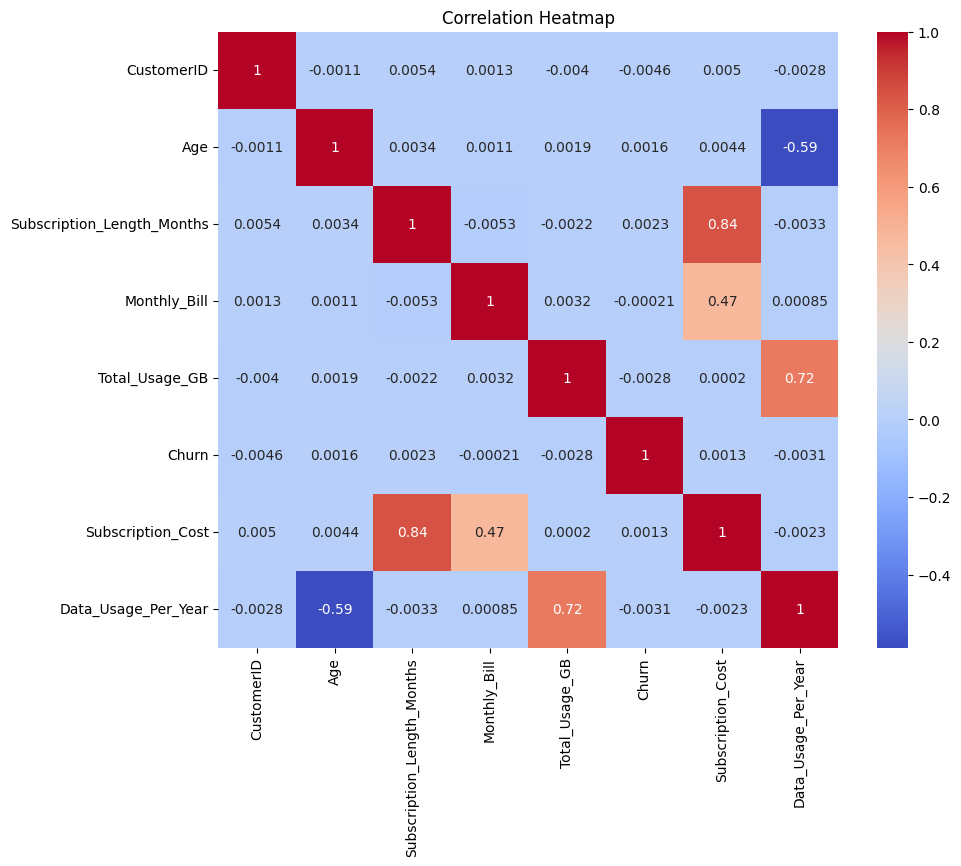

In [702]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Prepare the data for machine learning by encoding categorical variables and splitting it into training and testing sets.


In [703]:
X=data.drop('Churn', axis=1)
y=data['Churn'].copy()

In [704]:
X.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Subscription_Cost,Data_Usage_Per_Year
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,1247.12,3.746032
1,2,Customer_2,62,Female,New York,1,48.76,172,48.76,2.774194
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,427.35,19.166667
3,4,Customer_4,36,Female,Miami,3,97.94,297,293.82,8.250000
4,5,Customer_5,46,Female,Miami,19,58.14,266,1104.66,5.782609


In [705]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [706]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
assert(X_train.shape[0]==len(y_train))
assert(X_train.shape[1]==X_test.shape[1])
assert(X_test.shape[0]==len(y_test))

In [707]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 10)
(30000, 10)
(70000,)
(30000,)


In [708]:
y_train.value_counts()

0    35069
1    34931
Name: Churn, dtype: int64

In [709]:
y_test.value_counts()

0    15152
1    14848
Name: Churn, dtype: int64

In [710]:
X_train['CustomerID'].value_counts()

76514    1
45742    1
65299    1
13806    1
82192    1
        ..
99098    1
17828    1
81392    1
83213    1
15796    1
Name: CustomerID, Length: 70000, dtype: int64

In [711]:
X_train['Name'].value_counts()

Customer_76514    1
Customer_45742    1
Customer_65299    1
Customer_13806    1
Customer_82192    1
                 ..
Customer_99098    1
Customer_17828    1
Customer_81392    1
Customer_83213    1
Customer_15796    1
Name: Name, Length: 70000, dtype: int64

## Since name and customer_ID have a lot of variance, we drop these columns as all the values are unique and thus do not give any information about the churn.

In [712]:
X_train['Location'].value_counts()

Houston        14117
Miami          14112
Los Angeles    14014
New York       13918
Chicago        13839
Name: Location, dtype: int64

In [713]:
X_train.drop('CustomerID', axis=1, inplace=True)
X_train.drop('Name', axis=1, inplace=True)

In [714]:
X_train

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Subscription_Cost,Data_Usage_Per_Year
76513,25,Male,Los Angeles,13,98.13,468,1275.69,18.720000
60406,54,Female,Houston,2,71.90,383,143.80,7.092593
27322,32,Male,Chicago,20,65.65,427,1313.00,13.343750
53699,61,Female,Houston,12,83.20,64,998.40,1.049180
65412,70,Female,New York,5,41.93,99,209.65,1.414286
...,...,...,...,...,...,...,...,...
6265,35,Male,Miami,21,67.33,235,1413.93,6.714286
54886,56,Male,Chicago,13,85.40,347,1110.20,6.196429
76820,69,Male,Houston,2,76.24,321,152.48,4.652174
860,55,Male,Chicago,12,89.19,315,1070.28,5.727273


In [715]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [716]:
categorical_columns = ['Gender', 'Location']  # Add more columns as needed

# List of numerical columns (assuming the rest are numerical)
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

In [717]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [718]:
catdf=categorical_transformer.fit_transform(X_train[categorical_columns])

In [719]:
catdf.shape

(70000, 7)

In [720]:
one_hot_feature_names = categorical_transformer.named_steps['onehot'].get_feature_names_out(input_features=categorical_columns)

# Combine the one-hot encoded columns with the original numerical columns
catdfn = pd.DataFrame(
    data=catdf,
    columns=list(one_hot_feature_names)
)

In [721]:
catdfn.head()

,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [722]:
X_train.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Subscription_Cost,Data_Usage_Per_Year
76513,25,Male,Los Angeles,13,98.13,468,1275.69,18.720000
60406,54,Female,Houston,2,71.90,383,143.80,7.092593
27322,32,Male,Chicago,20,65.65,427,1313.00,13.343750
53699,61,Female,Houston,12,83.20,64,998.40,1.049180
65412,70,Female,New York,5,41.93,99,209.65,1.414286


In [723]:
# Create a preprocessing transformer for numerical columns (standardization)
from sklearn.preprocessing import StandardScaler
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [724]:
numdf = numerical_transformer.fit_transform(X_train[numerical_columns])

In [725]:
numdfn = pd.DataFrame(numdf,columns=numerical_columns)

In [726]:
numdfn.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Subscription_Cost,Data_Usage_Per_Year
0,-1.243589,0.074501,1.632642,1.481066,0.869151,2.415526
1,0.654284,-1.515230,0.336478,0.829765,-1.252240,-0.025979
2,-0.785482,1.086147,0.027632,1.166909,0.939077,1.286630
3,1.112391,-0.070020,0.894871,-1.614532,0.349453,-1.294965
4,1.701386,-1.081667,-1.144499,-1.346349,-1.128824,-1.218301


In [727]:
finaltrain = pd.concat([numdfn, catdfn], axis=1)

In [728]:
finaltrain.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Subscription_Cost,Data_Usage_Per_Year,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,-1.243589,0.074501,1.632642,1.481066,0.869151,2.415526,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.654284,-1.515230,0.336478,0.829765,-1.252240,-0.025979,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.785482,1.086147,0.027632,1.166909,0.939077,1.286630,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.112391,-0.070020,0.894871,-1.614532,0.349453,-1.294965,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.701386,-1.081667,-1.144499,-1.346349,-1.128824,-1.218301,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [729]:
finaltrain.shape

(70000, 13)

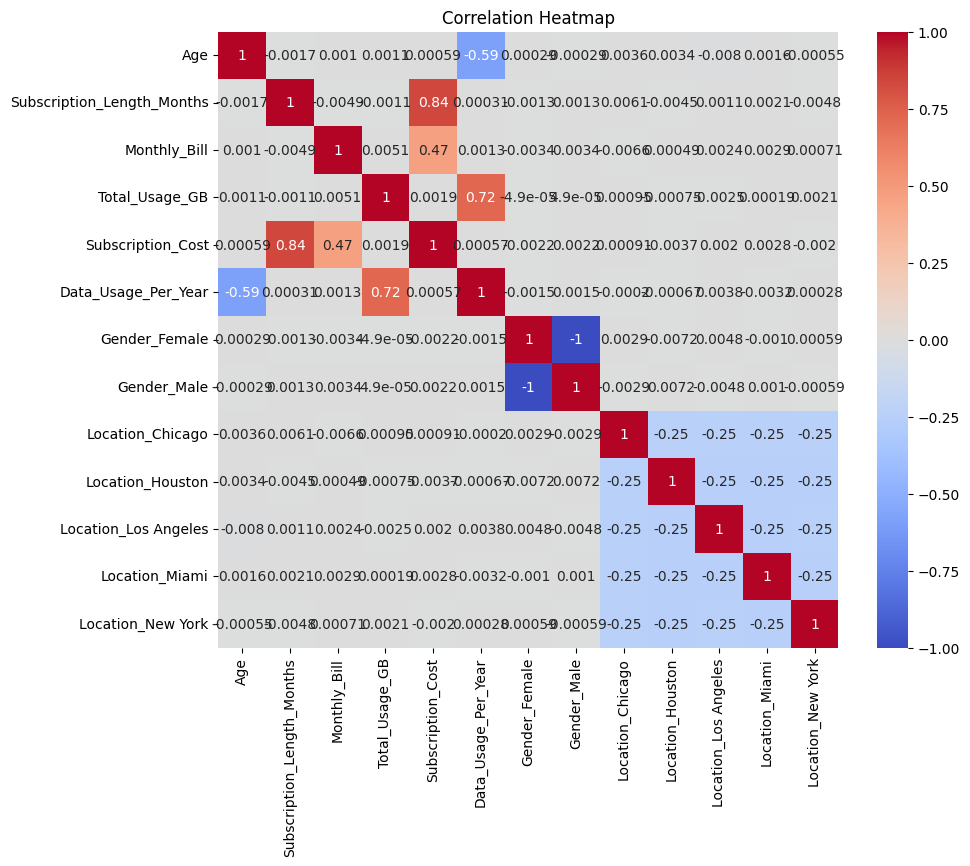

In [730]:
correlation_matrix = finaltrain.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [731]:
numdf = numerical_transformer.transform(X_test[numerical_columns])
numdfn = pd.DataFrame(numdf,columns=numerical_columns)
catdf=categorical_transformer.transform(X_test[categorical_columns])
# Combine the one-hot encoded columns with the original numerical columns
catdfn = pd.DataFrame(
    data=catdf,
    columns=list(one_hot_feature_names)
)
finaltest=pd.concat([numdfn, catdfn], axis=1)

In [732]:
finaltest.shape

(30000, 13)

In [733]:
finaltrain.isna().sum()

Age                           0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Subscription_Cost             0
Data_Usage_Per_Year           0
Gender_Female                 0
Gender_Male                   0
Location_Chicago              0
Location_Houston              0
Location_Los Angeles          0
Location_Miami                0
Location_New York             0
dtype: int64

## Modularizing the above code below

In [734]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
categorical_columns = ['Gender', 'Location']  # Add more columns as needed

# List of numerical columns (assuming the rest are numerical)
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

# Create a preprocessing transformer that applies one-hot encoding to categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Create a preprocessing transformer for numerical columns (standardization)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a final pipeline for preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_train_preprocessed = pipeline.fit_transform(X_train)
# one_hot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_columns)

# # Combine the one-hot encoded columns with the original numerical columns
# X_train_preprocessed_df = pd.DataFrame(
#     data=X_train_preprocessed,
#     columns=numerical_columns + list(one_hot_feature_names)
# )

In [735]:
X_test_preprocessed = pipeline.transform(X_test)

In [736]:
X_train_preprocessed.shape

(70000, 13)

## Model Building and Hyperparameter tuning

## Logistic Regression

In [753]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the pipeline
pipeline = Pipeline([
    ('feature_selector', SelectFromModel(LogisticRegression(random_state=random_seed, solver='saga'))),
    ('classifier', LogisticRegression(random_state=random_seed, solver='saga'))
])

# Fit the pipeline to the training data
pipeline.fit(X_train_preprocessed, y_train)
y_pred_train = pipeline.predict(X_train_preprocessed)
# Make predictions on the test data
y_pred_test = pipeline.predict(X_test_preprocessed)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Print evaluation metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Train Accuracy: 0.5057571428571429
Test Accuracy: 0.5003666666666666
Confusion Matrix:
 [[9577 5575]
 [9414 5434]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.63      0.56     15152
           1       0.49      0.37      0.42     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



Here the saga solver slightly increased the performance of the model because the size of the dataset is large.

In [754]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
def hptuning(model,param_grid,X_train,y_train,cv):
    grid_search = GridSearchCV(model,param_grid,cv=cv,return_train_score= True,n_jobs= -1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print("Best Hyperparameters:", best_params)
    print("Best Mean Test Score:", best_score)
    mean_train= grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
    mean_test= grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
    train_std= grid_search.cv_results_['std_train_score'][grid_search.best_index_]
    test_std= grid_search.cv_results_['std_test_score'][grid_search.best_index_]
    print("Mean Train score :" , mean_train)
    print('Std on Train set', train_std)
    print(" Mean Test score:" , mean_test)
    print('Std on Test set:', test_std)
    bestestimator = grid_search.best_estimator_
    y_pred = bestestimator.predict(X_train)
    print(classification_report(y_train, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

    print("------------------------------------------------------------------")

    return bestestimator, mean_train, mean_test

Best Hyperparameters: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'feature_selector__estimator__C': 0.1, 'feature_selector__estimator__penalty': 'l2'}
Best Mean Test Score: 0.5005571428571429
Mean Train score : 0.5054142857142857
Std on Train set 0.0012372513149423268
 Mean Test score: 0.5005571428571429
Std on Test set: 0.00425858077345983
              precision    recall  f1-score   support

           0       0.51      0.64      0.56     35069
           1       0.51      0.37      0.43     34931

    accuracy                           0.51     70000
   macro avg       0.51      0.51      0.50     70000
weighted avg       0.51      0.51      0.50     70000

------------------------------------------------------------------


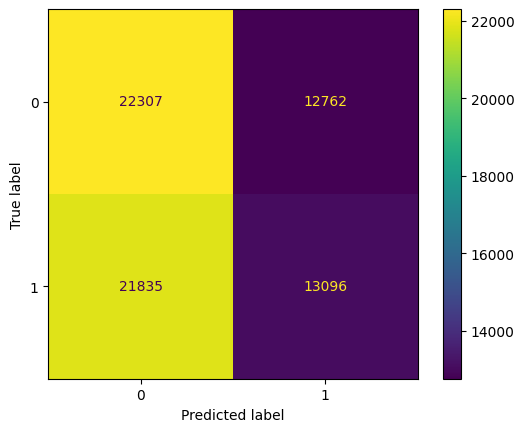

In [755]:
param_grid = {
    'feature_selector__estimator__C': [0.1, 1.0, 10.0],
    'feature_selector__estimator__penalty': ['l1', 'l2'],
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l1', 'l2']
}
bestmodel, train_score, test_score = hptuning(pipeline,param_grid,X_train_preprocessed,y_train,5)

In [756]:
bestmodel.score(X_test_preprocessed,y_test)

0.5003666666666666

In [757]:
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Train Accuracy': [train_score],
    'Test Accuracy': [test_score]
})

In [758]:
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.505414,0.500557


In [759]:
savedf=accuracy_df

## RandomForestClassifier

In [760]:
import numpy as np
from scipy.sparse import csr_matrix

# Convert the dense array to a sparse CSR matrix
X_train_sparse = csr_matrix(X_train_preprocessed)
X_test_sparse =csr_matrix(X_test_preprocessed)

In [771]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the pipeline
pipeline = Pipeline([
    ('feature_selector', SelectFromModel(RandomForestClassifier(random_state=random_seed, max_depth=4))),
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=4))
])

# Fit the pipeline to the training data
pipeline.fit(X_train_sparse, y_train)

y_pred_train = pipeline.predict(X_train_sparse)
# Make predictions on the test data
y_pred_test = pipeline.predict(X_test_sparse)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Print evaluation metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Train Accuracy: 0.5253
Test Accuracy: 0.5069333333333333
Confusion Matrix:
 [[9845 5307]
 [9485 5363]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.65      0.57     15152
           1       0.50      0.36      0.42     14848

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.50     30000
weighted avg       0.51      0.51      0.50     30000



In [746]:
# param_grid = {
#     'classifier__max_depth': [10],  # Maximum depth of trees
#     'classifier__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
#     'classifier__min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
# }
# bestmodel, train_score, test_score = hptuning(pipeline,param_grid,X_train_sparse,y_train,5)


KeyboardInterrupt: ignored

#### The hyperparameters in this case were set by trying each one of them out and comparing the train and test scores to check for overfitting because the tuning was taking a lot of time.

In [ ]:
# bestmodel.score(X_test_sparse,y_test)

In [775]:
newrow = {
    'Model': 'RandomForestClassifier',
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
}
accuracy_df = accuracy_df.append(newrow,ignore_index=True)

<ipython-input-775-00d6952c4c80>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [776]:
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.505414,0.500557
1,RandomForestClassifier,0.525300,0.506933


## LinearSVC

In [779]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the pipeline
pipeline = Pipeline([
    ('feature_selector', SelectFromModel(LinearSVC(random_state=42))),
    ('classifier', LinearSVC(random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train_sparse, y_train)

y_pred_train = pipeline.predict(X_train_sparse)
# Make predictions on the test data
y_pred_test = pipeline.predict(X_test_sparse)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Print evaluation metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Train Accuracy: 0.5057571428571429
Test Accuracy: 0.5003666666666666
Confusion Matrix:
 [[9577 5575]
 [9414 5434]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.63      0.56     15152
           1       0.49      0.37      0.42     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



In [672]:
# param_grid = {
#     'feature_selector__estimator__C': [0.1, 1.0, 10.0],
#     'feature_selector__estimator__penalty': ['l1', 'l2'],
#     'classifier__C': [0.1, 1.0, 10.0],
#     'classifier__penalty': ['l1', 'l2']
# }
# bestmodel, train_score, test_score = hptuning(pipeline,param_grid,X_train_sparse,y_train,5)

KeyboardInterrupt: ignored

In [ ]:
# bestmodel.score(X_test_sparse,y_test)

In [780]:
newrow = {
    'Model': 'LinearSVC',
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
}
accuracy_df = accuracy_df.append(newrow,ignore_index=True)

<ipython-input-780-552b9a5a723c>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [781]:
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.505414,0.500557
1,RandomForestClassifier,0.525300,0.506933
2,LinearSVC,0.505757,0.500367


## XGBoost

In [782]:
from xgboost import XGBClassifier

# Define the pipeline
pipeline = Pipeline([
    ('feature_selector', SelectFromModel(XGBClassifier(random_state=42))),
    ('classifier', XGBClassifier(random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train_sparse, y_train)

y_pred_train = pipeline.predict(X_train_sparse)
# Make predictions on the test data
y_pred_test = pipeline.predict(X_test_sparse)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# Print evaluation metrics
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Train Accuracy: 0.6454428571428571
Test Accuracy: 0.4987666666666667
Confusion Matrix:
 [[7800 7352]
 [7685 7163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51     15152
           1       0.49      0.48      0.49     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



Best Hyperparameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 2, 'classifier__subsample': 1.0}
Best Mean Test Score: 0.5010428571428571
Mean Train score : 0.5164928571428572
Std on Train set 0.0005641952911276342
 Mean Test score: 0.5010428571428571
Std on Test set: 0.0028652029169156787
              precision    recall  f1-score   support

           0       0.52      0.30      0.38     35069
           1       0.51      0.73      0.60     34931

    accuracy                           0.51     70000
   macro avg       0.52      0.51      0.49     70000
weighted avg       0.52      0.51      0.49     70000

------------------------------------------------------------------


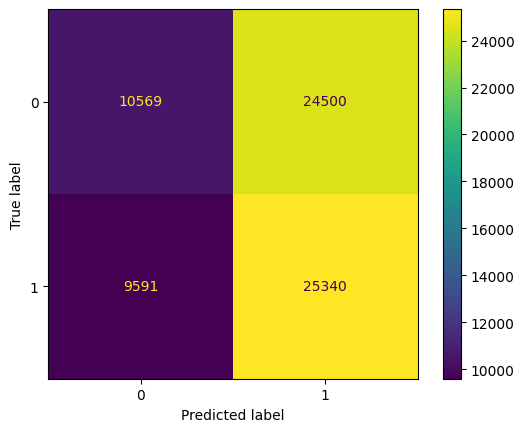

In [784]:
param_grid = {
    'classifier__n_estimators': [2, 4, 5],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 1.0]
}
bestmodel, train_score, test_score = hptuning(pipeline,param_grid,X_train_sparse,y_train,5)

In [785]:
bestmodel.score(X_test_sparse,y_test)

0.49666666666666665

In [786]:
newrow = {
    'Model': 'XGBoost',
    'Train Accuracy': train_score,
    'Test Accuracy': test_score
}
accuracy_df = accuracy_df.append(newrow,ignore_index=True)

<ipython-input-786-c996b5a375a6>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [787]:
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.505414,0.500557
1,RandomForestClassifier,0.525300,0.506933
2,LinearSVC,0.505757,0.500367
3,XGBoost,0.516493,0.501043


## Comparing the models

In [788]:
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.505414,0.500557
1,RandomForestClassifier,0.525300,0.506933
2,LinearSVC,0.505757,0.500367
3,XGBoost,0.516493,0.501043


Randomforestclassifier proves to perform slightly better than other models.

## Deep learning - neural network algorithms

In [789]:
import tensorflow as tf

tf.random.set_seed(42)

# Create a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [792]:
num_epochs = 3

# Fit the model to the training data
history = model.fit(
    X_train_preprocessed,
    y_train,
    epochs=num_epochs,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/3
1750/1750 [==============================] - 7s 3ms/step - loss: 0.6942 - accuracy: 0.5019 - precision: 0.4993 - recall: 0.4253 - val_loss: 0.6931 - val_accuracy: 0.5047 - val_precision: 0.5047 - val_recall: 1.0000
Epoch 2/3
1750/1750 [==============================] - 6s 3ms/step - loss: 0.6940 - accuracy: 0.5002 - precision: 0.4977 - recall: 0.4707 - val_loss: 0.6946 - val_accuracy: 0.4953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/3
1750/1750 [==============================] - 5s 3ms/step - loss: 0.6934 - accuracy: 0.5020 - precision: 0.4995 - recall: 0.4180 - val_loss: 0.6935 - val_accuracy: 0.4952 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


In [793]:
evaluation = model.evaluate(X_test_preprocessed, y_test)

print(f"Loss: {evaluation[0]:.2f}")
print(f"Accuracy: {evaluation[1] * 100:.2f}%")
print(f"Precision: {evaluation[2] * 100:.2f}%")
print(f"Recall: {evaluation[3] * 100:.2f}%")

938/938 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5050 - precision: 0.2857 - recall: 1.3470e-04
Loss: 0.69
Accuracy: 50.50%
Precision: 28.57%
Recall: 0.01%


The performance of neural networks is almost the same as the basic machine learning algorithms. It can be increased by performing more nuanced hyper parameter tuning and deep neural networks which, given the time constraints of this assignment has not been done due to resource limitations.

## Final model choice : Random Forest Classifier with the hyperparameters - max_depth =2 and others as default.

## Training the entire dataset using RFC

In [819]:
X.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Subscription_Cost
0,63,Male,Los Angeles,17,73.36,236,1247.12
1,62,Female,New York,1,48.76,172,48.76
2,24,Female,Los Angeles,5,85.47,460,427.35
3,36,Female,Miami,3,97.94,297,293.82
4,46,Female,Miami,19,58.14,266,1104.66


In [820]:
X.drop(['CustomerID', 'Name', 'Data_Usage_Per_Year'], axis=1, inplace=True)

KeyError: ignored

In [823]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
categorical_columns = ['Gender', 'Location']  # Add more columns as needed

# List of numerical columns (assuming the rest are numerical)
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Create a preprocessing transformer that applies one-hot encoding to categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Create a preprocessing transformer for numerical columns (standardization)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a final pipeline for preprocessing and modeling
preppipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [824]:
X_preprocessed = preppipeline.fit_transform(X)

In [825]:
X_sparse = csr_matrix(X_preprocessed)

In [826]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the pipeline
pipeline = Pipeline([
    ('feature_selector', SelectFromModel(RandomForestClassifier(random_state=random_seed, max_depth=4))),
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=4))
])

# Fit the pipeline to the training data
pipeline.fit(X_sparse, y)

y_pred = pipeline.predict(X_sparse)

# Evaluate the model
train_accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

# Print evaluation metrics
print("Train Accuracy:", train_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Train Accuracy: 0.51937
Confusion Matrix:
 [[41310  8911]
 [39152 10627]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.82      0.63     50221
           1       0.54      0.21      0.31     49779

    accuracy                           0.52    100000
   macro avg       0.53      0.52      0.47    100000
weighted avg       0.53      0.52      0.47    100000



In [827]:
import pickle

# Save the preprocessing pipeline to a file
with open('preprocessing_pipeline.pkl', 'wb') as file:
    pickle.dump(preppipeline, file)

# Save the feature selection/classification pipeline to a file
with open('classification_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [810]:
!pip install scikit-learn